In [1]:
# multi : category 확장
# Mu(x;N,p)

# scipy 는 다항 분포를 위한 multinomial 클래스 제공
# N : 시행 횟수
# p : 발생 확률

In [13]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

import pandas as pd

In [3]:
# parameters

N = 30
p = [0,0,0.1,0.2,0.3,0.4]

# 주사위 각 면이 나올 확융

In [4]:
rv = sp.stats.multinomial(N,p)

In [8]:
# random samples

np.random.seed(0)
X = rv.rvs(100)
print(X[:6])

# N = 30 번씩 주사위를 던졌을 때, 
# 각 숫자가 나온 횟수

# 이 과정을 100번 시킨 상태

# ex) 첫 30번에는 
# 1 이 0번
# 2 도 0번
# 3 은 3번
# 4 는 6번 ...

[[ 0  0  3  6  9 12]
 [ 0  0  5  9  6 10]
 [ 0  0  3  9  5 13]
 [ 0  0  5  7 10  8]
 [ 0  0  3  8  6 13]
 [ 0  0  6  5  8 11]]


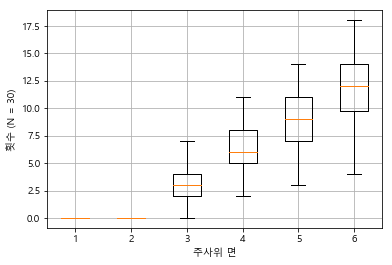

In [12]:
plt.boxplot(X)
plt.grid()
plt.xlabel('주사위 면')
plt.ylabel('횟수 (N = 30)')
plt.show()

In [20]:
# seaborn

df = pd.DataFrame(X).stack().reset_index()
df.head()

,level_0,level_1,0
0,0,0,0
1,0,1,0
2,0,2,3
3,0,3,6
4,0,4,9


In [27]:
df.columns = ['trial','class','binomial']
df.head()

,trial,class,binomial
0,0,0,0
1,0,1,0
2,0,2,3
3,0,3,6
4,0,4,9


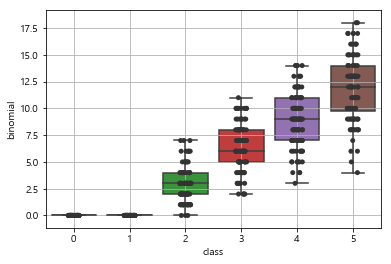

In [28]:
sns.boxplot(x='class',y='binomial',data=df)
sns.stripplot(x='class',y='binomial',data=df, jitter=True, color='.2') # 진한 검정
plt.grid()
plt.show()

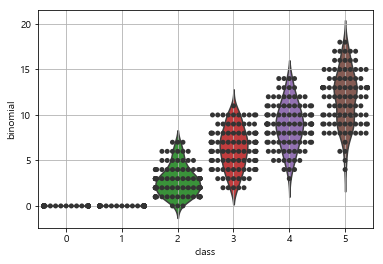

In [43]:
sns.violinplot(x='class',y='binomial',data=df, inner='quartile')
sns.swarmplot(x='class',y='binomial',data=df, color='.2')
plt.grid()
plt.show()
# inner : {“box”, “quartile”, “point”, “stick”, None}